In [1]:
# Import necessary libraries
import torch
import torch.nn as nn
import torch.optim as optim
import matplotlib.pyplot as plt

In [2]:
# Setup device-agnostic code
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

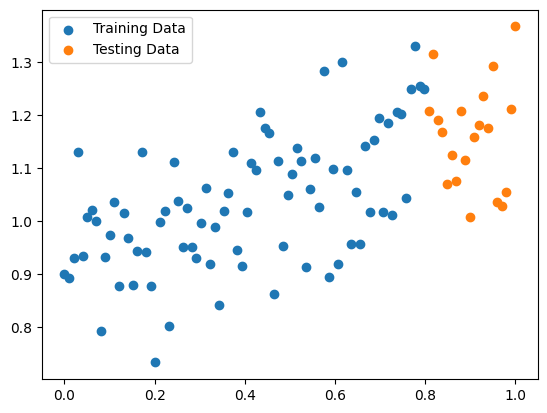

In [3]:
# 1. Create a straight line dataset using linear regression formula
weight = 0.3
bias = 0.9
total_samples = 100

X = torch.linspace(0, 1, total_samples)
y = weight * X + bias + torch.randn_like(X) * 0.1

# Split the data into training and testing
train_size = int(0.8 * total_samples)
X_train, X_test = X[:train_size], X[train_size:]
y_train, y_test = y[:train_size], y[train_size:]

# Plot the training and testing data
plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_test, label='Testing Data')
plt.legend()
plt.show()

In [4]:
# 2. Build a PyTorch model by subclassing nn.Module
class LinearRegressionModel(nn.Module):
    def __init__(self):
        super(LinearRegressionModel, self).__init__()
        self.weights = nn.Parameter(torch.randn(1, requires_grad=True))
        self.bias = nn.Parameter(torch.randn(1, requires_grad=True))

    def forward(self, X):
        return self.weights * X + self.bias

# Instantiate the model and put it on the target device
model = LinearRegressionModel().to(device)

In [5]:
# 3. Create a loss function and optimizer
criterion = nn.L1Loss()
optimizer = optim.SGD(model.parameters(), lr=0.01)

# Training loop
epochs = 300

for epoch in range(epochs):
    # Training
    model.train()

    # Forward pass
    predictions = model(X_train)

    # Calculate loss
    loss = criterion(predictions, y_train.unsqueeze(1))

    # Zero gradients
    optimizer.zero_grad()

    # Backpropagation
    loss.backward()

    # Step the optimizer
    optimizer.step()

    # Perform testing every 20 epochs
    if epoch % 20 == 0:
        # Put model in evaluation mode
        model.eval()

        # Forward pass on test data
        test_predictions = model(X_test)

        # Calculate test loss
        test_loss = criterion(test_predictions, y_test.unsqueeze(1))

        # Print out the progress
        print(f"Epoch: {epoch} | Train loss: {loss:.3f} | Test loss: {test_loss:.3f}")

/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([80, 1])) that is different to the input size (torch.Size([80])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)
/usr/local/lib/python3.10/dist-packages/torch/nn/modules/loss.py:101: UserWarning: Using a target size (torch.Size([20, 1])) that is different to the input size (torch.Size([20])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.l1_loss(input, target, reduction=self.reduction)


Epoch: 0 | Train loss: 1.729 | Test loss: 1.878
Epoch: 20 | Train loss: 1.497 | Test loss: 1.606
Epoch: 40 | Train loss: 1.265 | Test loss: 1.333
Epoch: 60 | Train loss: 1.033 | Test loss: 1.061
Epoch: 80 | Train loss: 0.802 | Test loss: 0.789
Epoch: 100 | Train loss: 0.570 | Test loss: 0.517
Epoch: 120 | Train loss: 0.340 | Test loss: 0.246
Epoch: 140 | Train loss: 0.180 | Test loss: 0.086
Epoch: 160 | Train loss: 0.143 | Test loss: 0.094
Epoch: 180 | Train loss: 0.135 | Test loss: 0.107
Epoch: 200 | Train loss: 0.131 | Test loss: 0.107
Epoch: 220 | Train loss: 0.129 | Test loss: 0.103
Epoch: 240 | Train loss: 0.126 | Test loss: 0.097
Epoch: 260 | Train loss: 0.123 | Test loss: 0.092
Epoch: 280 | Train loss: 0.121 | Test loss: 0.087


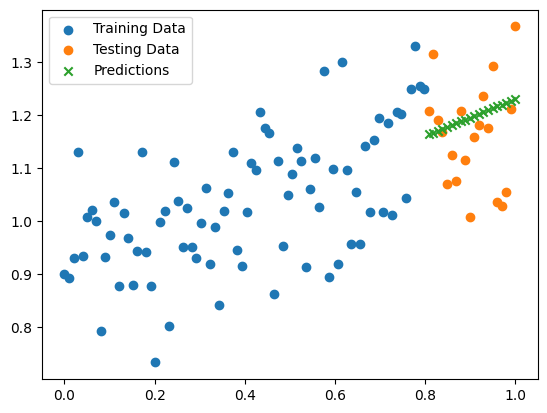

In [6]:
# 4. Make predictions with the trained model on the test data
model.eval()
test_predictions = model(X_test)

# Plot the predictions
plt.scatter(X_train, y_train, label='Training Data')
plt.scatter(X_test, y_test, label='Testing Data')
plt.scatter(X_test, test_predictions.detach().numpy(), label='Predictions', marker='x')
plt.legend()
plt.show()

In [7]:
# 5. Save trained model's state_dict() to file
models_dir = Path("PATH NYA")
models_dir.mkdir(exist_ok=True)

model_save_path = models_dir / "linear_regression_model.pth"
torch.save(model.state_dict(), model_save_path)

# Create a new instance of the model and load in the saved state_dict()
new_model = LinearRegressionModel().to(device)
new_model.load_state_dict(torch.load(model_save_path))

# Make predictions with the loaded model and compare with the original predictions
loaded_predictions = new_model(X_test)

# Print the results
print("Original Predictions:\n", test_predictions)
print("Loaded Model Predictions:\n", loaded_predictions)

NameError: name 'Path' is not defined